In [55]:
import os
from skimage import io, exposure

def increment_domain(x, y, domain):
    exists = defaultdict(int, {key: value for key, value in zip(x,y)})
    return [exists[v] for v in domain]

def get_dataframe(root_folder):
    results = {}
    for genre in os.listdir(root_folder):
        genre_folder = os.path.join(root_folder,genre)
        for manga in os.listdir(genre_folder):
            manga_folder = os.path.join(genre_folder,manga)
            for page in os.listdir(manga_folder):
                page_path = os.path.join(manga_folder,page)
                image = io.imread(page_path)
                y, x = exposure.histogram(image)
                results[(genre, manga, page)] = [genre, manga, page] + increment_domain(x,y,range(0,256))
    df = pd.DataFrame.from_dict(results,orient="index")
    df.columns = ["genre", "manga", "page"] + list(range(0,256))
    return df

df_train = get_dataframe("./data/train")
df_validate = get_dataframe("./data/validate")

In [24]:
df_train["y"] = df_train["genre"].apply(lambda v: 1 if "shounen" else 0)

In [25]:
df_train.head()

,genre,manga,page,0,1,2,3,4,5,6,...,247,248,249,250,251,252,253,254,255,y
"(shoujo, AisazuNihaIrarenai, AisazuNihaIrarenai_000_00.jpg)",shoujo,AisazuNihaIrarenai,AisazuNihaIrarenai_000_00.jpg,430,405,579,506,448,396,391,...,1657,1819,2103,2305,2985,3541,4764,5678,15180,1
"(shoujo, AisazuNihaIrarenai, AisazuNihaIrarenai_000_01.jpg)",shoujo,AisazuNihaIrarenai,AisazuNihaIrarenai_000_01.jpg,730,221,242,280,254,221,236,...,1038,1189,1397,1576,1929,2242,2827,3117,6830,1
"(shoujo, AisazuNihaIrarenai, AisazuNihaIrarenai_000_02.jpg)",shoujo,AisazuNihaIrarenai,AisazuNihaIrarenai_000_02.jpg,610,595,641,671,642,532,457,...,1305,1415,1636,2010,2643,3619,5535,7967,27150,1
"(shoujo, AisazuNihaIrarenai, AisazuNihaIrarenai_001_00.jpg)",shoujo,AisazuNihaIrarenai,AisazuNihaIrarenai_001_00.jpg,0,0,0,0,0,0,0,...,189,214,207,257,210,180,184,169,890,1
"(shoujo, AisazuNihaIrarenai, AisazuNihaIrarenai_002_01.jpg)",shoujo,AisazuNihaIrarenai,AisazuNihaIrarenai_002_01.jpg,5832,644,657,607,720,713,631,...,2748,3026,3375,3847,4426,5728,10216,15199,142542,1


In [56]:
df_train['y'] = 0
df_train['y'][df_train['genre'] == 'shounen'] = 1

df_validate['y'] = 0
df_validate['y'][df_validate['genre'] == 'shounen'] = 1


C:\Users\cake\AppData\Local\conda\conda\envs\lobsang\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\cake\AppData\Local\conda\conda\envs\lobsang\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [75]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

x_train = df_train.iloc[:,3:-1].values
y_train = df_train.loc[:,"y"].values

clf = RandomForestClassifier(n_estimators=500)
clf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [78]:
x_validate = df_validate.iloc[:,3:-1].values
y_validate = df_validate.loc[:,"y"].values
pred_validate = clf.predict(x_validate)
prob_validate = clf.predict_proba(x_validate)

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
accuracy_score(y_validate,pred_validate)

0.7503191217768701

In [80]:
recall_score(y_validate,pred_validate)

0.88034865293185416

In [81]:
roc_auc_score(y_validate,prob_validate[:,1])

0.81373971396488898

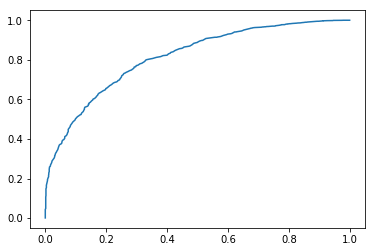

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_validate, prob_validate[:,1])
plt.plot(fpr,tpr)